In [2]:
import pandas as pd
import numpy as np

## 数据分组及操作

### 一、分组 groupby

In [3]:
df = pd.read_csv('data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# 每年的平均寿命
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [5]:
# 每个大洲的平均寿命
df.groupby('continent')['lifeExp'].mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [6]:
# 每个国家的平均寿命
df.groupby('country')['lifeExp'].mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [7]:
# 每个大洲的每个国家的平均寿命
df.groupby(['continent', 'country'])['lifeExp'].mean()

continent  country       
Africa     Algeria           59.030167
           Angola            37.883500
           Benin             48.779917
           Botswana          54.597500
           Burkina Faso      44.694000
                               ...    
Europe     Switzerland       75.565083
           Turkey            59.696417
           United Kingdom    73.922583
Oceania    Australia         74.662917
           New Zealand       73.989500
Name: lifeExp, Length: 142, dtype: float64

#### 关于分组字段选择: 需要根据需求定义；一定要跟着聚合操作，脱离聚合操作的分组没有意义。

#### 分组参数 as_index 控制分组字段是否作为index

In [8]:
# 默认分组字段会被作为索引
df.groupby('year')[['lifeExp']].mean()

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


In [9]:
df.groupby('year', as_index=False)[['lifeExp']].mean()

,year,lifeExp
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249
3,1967,55.678290
4,1972,57.647386
5,1977,59.570157
6,1982,61.533197
7,1987,63.212613
8,1992,64.160338
9,1997,65.014676


### 二、聚合函数

#### 1.1 内置聚合函数
**内置聚合函数是groupby返回的对象DataFrameGroupBy,SeriesGroupBy的方法**

In [10]:
data = pd.DataFrame([
    ['aa', True, True],
    ['aa', True, False],
    ['bb', True, False]
], columns=['c_1', 'c_2', 'c_3'])

##### 1.1.1 all 【判断全true，返回bool】

In [11]:
data.groupby('c_1')['c_2'].all()

c_1
aa    True
bb    True
Name: c_2, dtype: bool

In [12]:
data.groupby('c_1')['c_3'].all()

c_1
aa    False
bb    False
Name: c_3, dtype: bool

##### 1.1.2 any 【判断有true，返回bool】

In [13]:
data.groupby('c_1')['c_2'].any()

c_1
aa    True
bb    True
Name: c_2, dtype: bool

In [14]:
data.groupby('c_1')['c_3'].any()

c_1
aa     True
bb    False
Name: c_3, dtype: bool

##### 1.1.2 count 【统计数量，返回每个分组的数量，选择没有空的字段进行统计】

In [15]:
data1 = pd.DataFrame([
    ['aa', True, True, 1, 1],
    ['aa', True, False, 2, 2],
    ['bb', True, False, 3, np.NAN],
    ['bb', True, False, 4, 4],
    ['bb', True, False, 5, 5]
], columns=['c_1', 'c_2', 'c_3', 'c_4', 'c_5'])

In [16]:
data1.groupby('c_1')['c_4'].count()

c_1
aa    2
bb    3
Name: c_4, dtype: int64

In [17]:
data1.groupby('c_1')['c_5'].count()

c_1
aa    2
bb    2
Name: c_5, dtype: int64

##### 1.1.3 value_counts 【根据值，进行再分组统计次数】

In [18]:
data5 = pd.DataFrame([
    ['aa', 1],
    ['aa', 1],
    ['aa', 2],
    ['aa', 2],
    ['aa', 2],
    ['aa', 3],
    ['bb', 1],
    ['bb', 2],
], columns=['c_1', 'c_2'])

In [19]:
data5.groupby('c_1')['c_2'].value_counts()

c_1  c_2
aa   2      3
     1      2
     3      1
bb   1      1
     2      1
Name: c_2, dtype: int64

##### 1.1.3 sum 【求和聚合字段，根据选择聚合字段的值进行求和】

In [20]:
data1.groupby('c_1')['c_4'].sum()

c_1
aa     3
bb    12
Name: c_4, dtype: int64

##### 1.1.3 max、min 【找出聚合字段最值，根据选择聚合字段的值寻找】

In [21]:
data1.groupby('c_1')['c_4'].max()

c_1
aa    2
bb    5
Name: c_4, dtype: int64

##### 1.1.5 unique 【去重聚合值，根据选择聚合字段的值去重】

In [22]:
data2 = pd.DataFrame([
    ['aa', 2, True],
    ['aa', 4, False],
    ['bb', 5, True],
    ['bb', 5, False],
    ['bb', 5, False]
], columns=['c_1', 'c_2', 'c_3'])

In [23]:
data2.groupby('c_1')['c_2'].unique()

c_1
aa    [2, 4]
bb       [5]
Name: c_2, dtype: object

##### 1.1.6 nunique 【去重聚合值计数，根据选择聚合字段的值去重计数】

In [24]:
data2.groupby('c_1')['c_2'].nunique()

c_1
aa    2
bb    1
Name: c_2, dtype: int64

##### 1.1.7 mean、median、std 【求值，根据选择聚合字段的值求平均值，中位数、方差】

In [25]:
data2.groupby('c_1')['c_2'].median()

c_1
aa    3.0
bb    5.0
Name: c_2, dtype: float64

##### 1.1.8 first、last、head、tail 【位置范围值】

In [26]:
data2.groupby('c_1')['c_2'].first()

c_1
aa    2
bb    5
Name: c_2, dtype: int64

##### 1.1.8 cumsum 【累和】

In [27]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [28]:
df.groupby('continent')['gdpPercap'].cumsum()

0       7.794453e+02
1       1.600298e+03
2       2.453399e+03
3       3.289596e+03
4       4.029577e+03
            ...     
1699    1.366275e+06
1700    1.366969e+06
1701    1.367761e+06
1702    1.368433e+06
1703    1.368903e+06
Name: gdpPercap, Length: 1704, dtype: float64

##### 1.1.9 plot 【绘图】

continent
Africa      Axes(0.125,0.11;0.775x0.77)
Americas    Axes(0.125,0.11;0.775x0.77)
Asia        Axes(0.125,0.11;0.775x0.77)
Europe      Axes(0.125,0.11;0.775x0.77)
Oceania     Axes(0.125,0.11;0.775x0.77)
Name: lifeExp, dtype: object

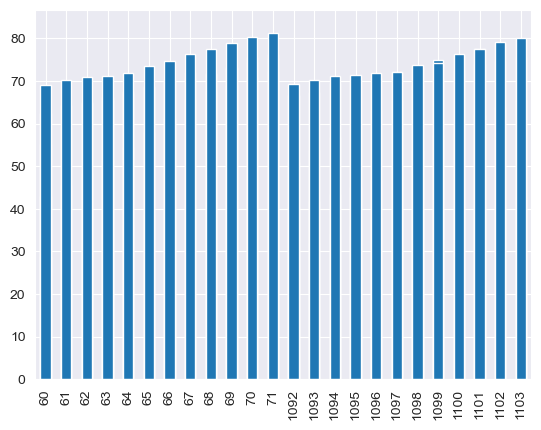

In [29]:
df.groupby('continent')['lifeExp'].plot(kind='bar')

#### DataFrameGroupBy groups用法

In [50]:
# 按大洲分组
group_by_continent = df.groupby('continent')
group_by_continent.groups

{'Africa': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, ...], 'Americas': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 432, 433, 434, 435, ...],

In [59]:
# 遍历分组，获取到5大洲
'''
def get_group(self, name, obj=None) -> DataFrame | Series:
'''
group_data = group_by_continent.get_group('Africa')
group_data['pop'].sum()

6187585961

#### 1.2 自定义聚合函数

##### 自定义聚合函数apply

In [31]:
def myfunc(x):
    return (x ** 2) - 1

df.groupby('continent')[['pop']].apply(myfunc)

/var/folders/b4/glz9zwj572q15bxbv_pxjymm0000gn/T/ipykernel_3300/924176729.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('continent')[['pop']].apply(myfunc)


,pop
0,70986236160888
1,85394861192355
2,105412993328888
3,133124659417155
4,171072273891599
...,...
1699,84942360750723
1700,114582894835599
1701,130072838882703
1702,142242904992968


##### 对于分组返回的结果类型不同（DataFrameGroupby, SeriesGroupby）所以apply在调用自定函数是，传入数据类型也不同，见： Pandas_apply自定义函数

##### 自定义聚合函数agg
**agg {'字段1': '聚合方法', '字段2': '聚合方法', ...} 可以对不同字段进行不同的聚合方法**

In [32]:
df1 = pd.DataFrame(np.random.randint(1, 10, (3, 5)), columns=['col_1', 'col_2', 'col_3', 'col_4', 'col_5'])
df1

,col_1,col_2,col_3,col_4,col_5
0,2,7,8,7,5
1,4,8,9,8,3
2,1,6,4,8,3


In [33]:
# 指定不同列进行不同的聚合函数
df1.agg({'col_1':'sum',
        'col_2':'mean',
        'col_3':'min',
        'col_4':'max',
        'col_5':'std'})

col_1    7.000000
col_2    7.000000
col_3    4.000000
col_4    8.000000
col_5    1.154701
dtype: float64

#### 1.3 聚合字段选择结论
- 聚合使用字段的选择，需要看聚合使用的函数。
    - 如果是mean、min、max这种和此列值有关系的函数，那么需要根据需求找指定的列。
    - 如果是count这种，统计分组结果的函数，选择字段的限制只有列内有没有nan。

### 三、转换函数 transform

In [34]:
# 案例1:
def my_zscore(x):
    return (x - x.mean()) / x.std()

In [35]:
df.shape

(1704, 6)

In [36]:
df.groupby('year')['lifeExp'].transform(my_zscore)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64

In [37]:
# 案例2:
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
# tip取样10个
tips10 = tips.sample(10, random_state=22)
# 打乱index（permutition） 给tip列前4行赋值nan
tips10.loc[np.random.permutation(tips10.index)[:4], 'tip'] = np.NAN
# 按性别分组，对小费的缺失值，使用对应分组tip的均值填充nan
def fill_mean(x):
    return x.fillna(x.mean())
tips10.groupby('sex')['tip'].transform(fill_mean)

200    3.823333
112    4.000000
128    2.000000
179    3.550000
49     3.823333
15     3.920000
184    3.823333
213    2.500000
32     3.000000
55     3.823333
Name: tip, dtype: float64

#### 测试案例：

In [39]:
# 需求：存在数据bob和amy在近几个月的内的体重值，计算得出他们谁减重更多
weight_loss = pd.read_csv('./data/weight_loss.csv')

In [40]:
weight_loss.head()

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283


In [41]:
weight_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    32 non-null     object
 1   Month   32 non-null     object
 2   Week    32 non-null     object
 3   Weight  32 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [42]:
weight_loss.describe()

,Weight
count,32.000000
mean,223.750000
std,48.777308
min,161.000000
25%,173.000000
50%,223.500000
75%,268.000000
max,291.000000


In [43]:
# 计算减重比例
# 传入的是使用name分组后的体重series
# 分别为week 1 ～ week 4
# x.iloc[0] 为第一周的体重，及原始体重
# x为当前周的体重，
# 每周累计的减重比例为 x.iloc[0] - x / x.iloc[0]
def func(x):
    return (x.iloc[0] - x) / x.iloc[0]

In [44]:
# 只查询一月分的数据, 验证自定义获取减重比例函数
data = weight_loss.query("Month == 'Jan'")
data.loc[:,'sub_Weight'] = data.groupby('Name')['Weight'].transform(func)
# 分别获取俩人这个月的体重
bob_data = data[data['Name'] == 'Bob']
bob_data = bob_data.reset_index().loc[:, ['Weight', 'sub_Weight']]
amy_data = data[data['Name'] == 'Amy']
amy_data = amy_data.reset_index().loc[:, ['Weight', 'sub_Weight']]
# 比较俩个人每月减重较多的人
bob_data - amy_data

/var/folders/b4/glz9zwj572q15bxbv_pxjymm0000gn/T/ipykernel_3300/2840637856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'sub_Weight'] = data.groupby('Name')['Weight'].transform(func)


,Weight,sub_Weight
0,94,0.000000
1,99,-0.030300
2,94,-0.013118
3,93,-0.008042


In [45]:
weight_loss['sub'] = weight_loss.groupby(['Name', 'Month'])['Weight'].transform(func)

In [46]:
bob_data_index = weight_loss.query('Name == "Bob" and Week == "Week 4"')[['Month', 'sub']].set_index('Month')
amy_data_index = weight_loss.query('Name == "Amy" and Week == "Week 4"')[['Month', 'sub']].set_index('Month')

In [47]:
# 比较结果
bob_data_index - amy_data_index

,sub
Month,
Jan,-0.008042
Feb,-0.036470
Mar,0.008778
Apr,-0.010796


### 三、过滤函数 filter

**filter内需要是返回bool值的函数，可以是内置、自定义、匿名；过滤留下所有True的值**

In [48]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [49]:
# 过滤size count大于5的数据
tips.groupby('size').filter(lambda x:x['size'].count() > 5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
